### Support Vector Machine(SVM)

### Step 1: Import Necessary Libraries

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier

### Step 2: Load and Prepare the Data


In [89]:
df = pd.read_csv(r"C:\Users\sonic\Downloads\FlightDelays.csv")

In [90]:
df.head()

,schedtime,carrier,deptime,dest,distance,date,flightnumber,origin,weather,dayweek,daymonth,tailnu,delay
0,1455,OH,1455,JFK,184,1/1/2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,1/1/2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,1/1/2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,1/1/2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,1/1/2004,7792,IAD,0,4,1,N698BR,ontime


### 3.Data Analysis and Preparation

In [91]:
df.shape

(2201, 13)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   schedtime     2201 non-null   int64 
 1   carrier       2201 non-null   object
 2   deptime       2201 non-null   int64 
 3   dest          2201 non-null   object
 4   distance      2201 non-null   int64 
 5   date          2201 non-null   object
 6   flightnumber  2201 non-null   int64 
 7   origin        2201 non-null   object
 8   weather       2201 non-null   int64 
 9   dayweek       2201 non-null   int64 
 10  daymonth      2201 non-null   int64 
 11  tailnu        2201 non-null   object
 12  delay         2201 non-null   object
dtypes: int64(7), object(6)
memory usage: 223.7+ KB


In [93]:
df.tail()

,schedtime,carrier,deptime,dest,distance,date,flightnumber,origin,weather,dayweek,daymonth,tailnu,delay
2196,645,RU,644,EWR,199,1/31/2004,2761,DCA,0,6,31,N15555,ontime
2197,1700,RU,1653,EWR,213,1/31/2004,2497,IAD,0,6,31,N16976,ontime
2198,1600,RU,1558,EWR,199,1/31/2004,2361,DCA,0,6,31,N14902,ontime
2199,1359,RU,1403,EWR,199,1/31/2004,2216,DCA,0,6,31,N16961,ontime
2200,1730,RU,1736,EWR,199,1/31/2004,2097,DCA,0,6,31,N13994,ontime


In [94]:
df.describe()

,schedtime,deptime,distance,flightnumber,weather,dayweek,daymonth
count,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000
mean,1371.938664,1369.298955,211.871422,3815.086324,0.014539,3.905498,16.024989
std,432.697149,442.462754,13.316815,2409.750224,0.119725,1.903149,8.677390
min,600.000000,10.000000,169.000000,746.000000,0.000000,1.000000,1.000000
25%,1000.000000,1004.000000,213.000000,2156.000000,0.000000,2.000000,8.000000
50%,1455.000000,1450.000000,214.000000,2385.000000,0.000000,4.000000,16.000000
75%,1710.000000,1709.000000,214.000000,6155.000000,0.000000,5.000000,23.000000
max,2130.000000,2330.000000,229.000000,7924.000000,1.000000,7.000000,31.000000


### 4.Distribution of variables

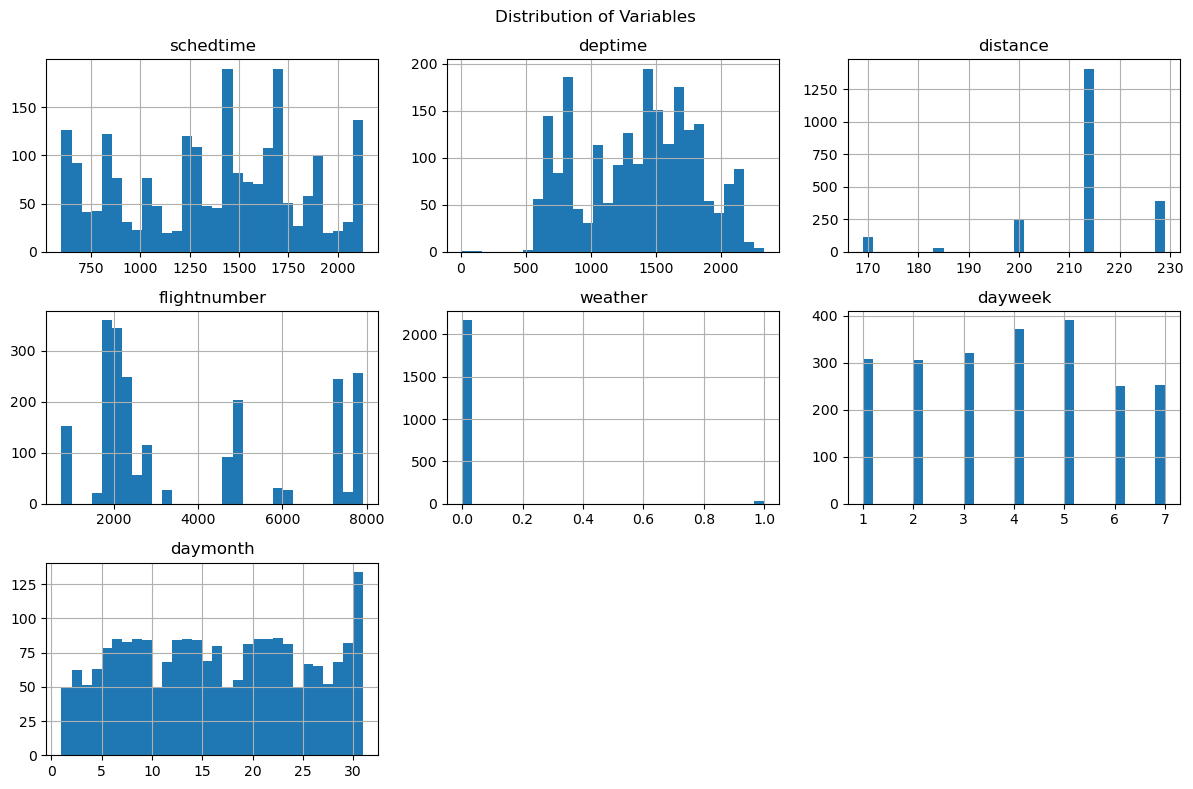

In [95]:
df.hist(figsize=(12, 8), bins=30)
plt.suptitle("Distribution of Variables")
plt.tight_layout()
plt.show()

In [96]:
df.isnull().sum()

schedtime       0
carrier         0
deptime         0
dest            0
distance        0
date            0
flightnumber    0
origin          0
weather         0
dayweek         0
daymonth        0
tailnu          0
delay           0
dtype: int64

<Axes: >

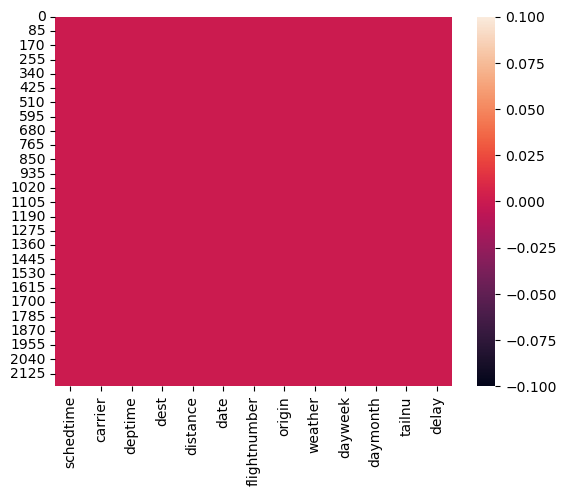

In [97]:
sns.heatmap(df.isnull())                     # Not missing value chart

In [68]:
df.columns

Index(['schedtime', 'carrier', 'deptime', 'dest', 'distance', 'date',
       'flightnumber', 'origin', 'weather', 'dayweek', 'daymonth', 'tailnu',
       'delay'],
      dtype='object')

### 5.Correlation heatmap

In [69]:
# Select numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])


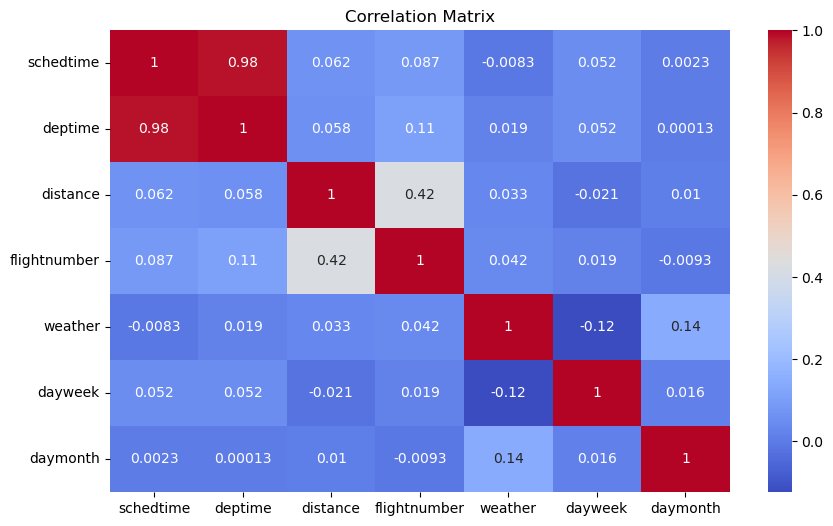

In [70]:
# Calculate correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


 ### 6.Detect outliers (boxplots)

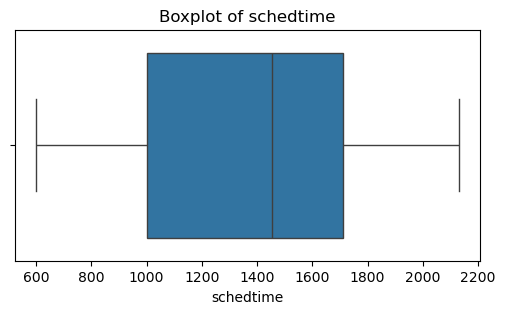

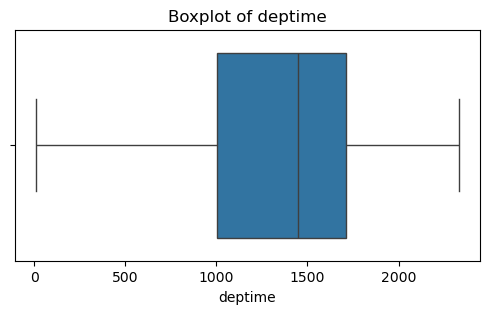

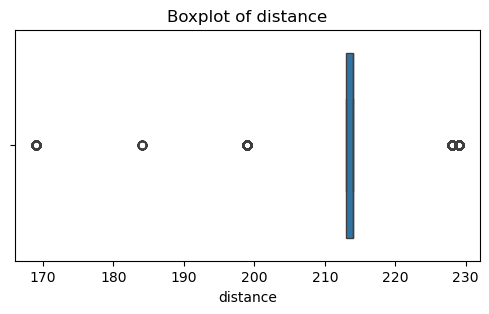

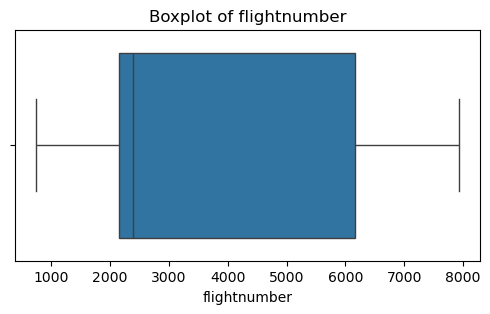

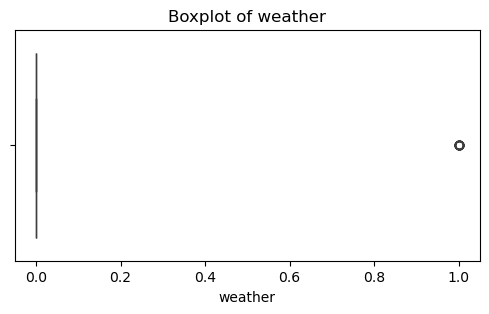

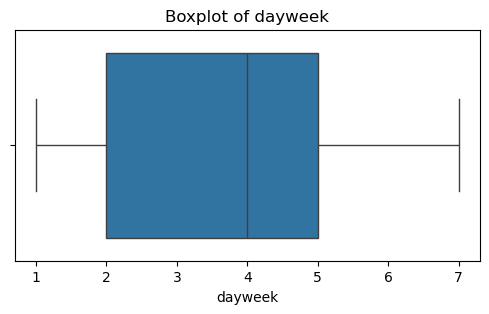

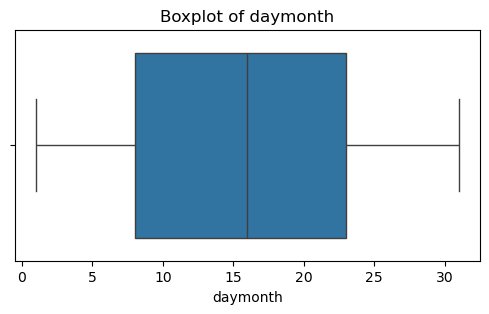

In [71]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

### 7.Check for missing values

In [72]:
df.isnull().sum()

schedtime       0
carrier         0
deptime         0
dest            0
distance        0
date            0
flightnumber    0
origin          0
weather         0
dayweek         0
daymonth        0
tailnu          0
delay           0
dtype: int64

In [98]:
# Drop columns that won't help
df = df.drop(['date', 'tailnu', 'flightnumber', 'schedtime'], axis=1)

In [111]:
# Handle missing values if any
df.dropna(inplace=True)

In [112]:
df[df.duplicated()]
df

,deptime,distance,weather,dayweek,daymonth,carrier_DH,carrier_DL,carrier_MQ,carrier_OH,carrier_RU,carrier_UA,carrier_US,dest_JFK,dest_LGA,origin_DCA,origin_IAD,delay_ontime
0,1455,184,0,4,1,False,False,False,True,False,False,False,True,False,False,False,True
1,1640,213,0,4,1,True,False,False,False,False,False,False,True,False,True,False,True
2,1245,229,0,4,1,True,False,False,False,False,False,False,False,True,False,True,True
3,1709,229,0,4,1,True,False,False,False,False,False,False,False,True,False,True,True
4,1035,229,0,4,1,True,False,False,False,False,False,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,644,199,0,6,31,False,False,False,False,True,False,False,False,False,True,False,True
2197,1653,213,0,6,31,False,False,False,False,True,False,False,False,False,False,True,True
2198,1558,199,0,6,31,False,False,False,False,True,False,False,False,False,True,False,True
2199,1403,199,0,6,31,False,False,False,False,True,False,False,False,False,True,False,True


### 8.Prepare the Data

In [113]:
df = pd.get_dummies(df, drop_first=True)

### Scatter
This will give you one scatter plot per feature, all against 'yr'

In [114]:
print(df.columns)

Index(['deptime', 'distance', 'weather', 'dayweek', 'daymonth', 'carrier_DH',
       'carrier_DL', 'carrier_MQ', 'carrier_OH', 'carrier_RU', 'carrier_UA',
       'carrier_US', 'dest_JFK', 'dest_LGA', 'origin_DCA', 'origin_IAD',
       'delay_ontime'],
      dtype='object')


In [115]:
# Select a subset of columns for analysis
features = ['distance', 'dayweek', 'daymonth', 'delay_ontime']


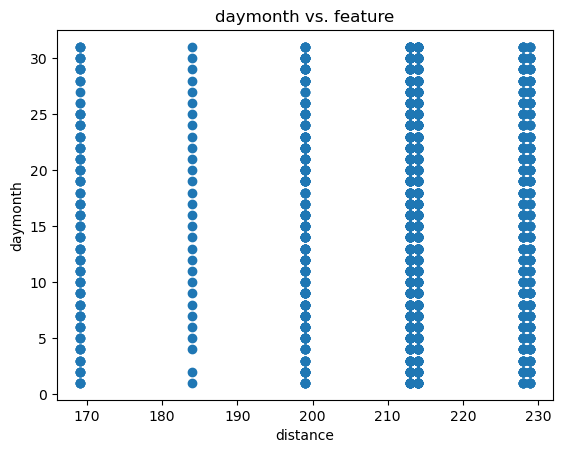

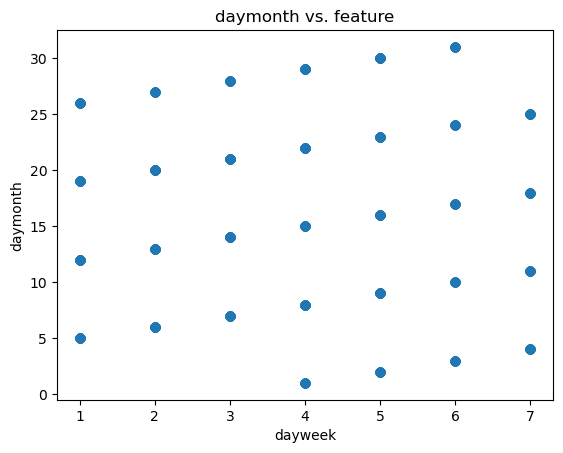

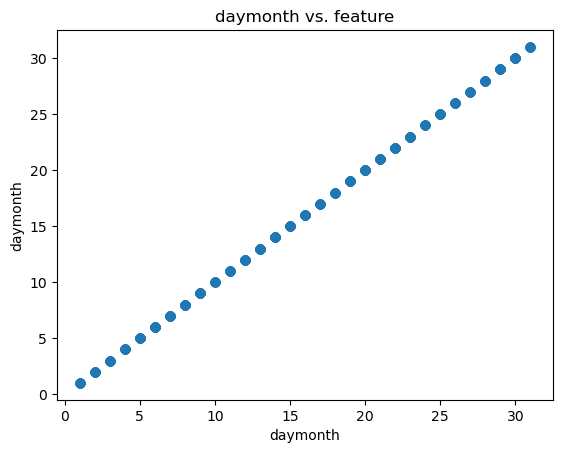

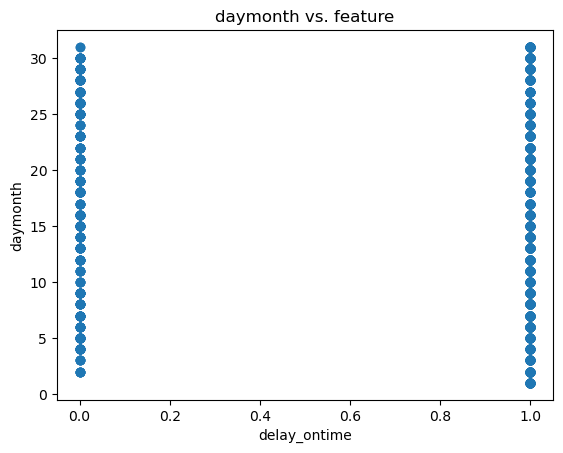

In [116]:
features = ['distance', 'dayweek', 'daymonth', 'delay_ontime']
for feature in features:
        plt.figure()
        plt.scatter(df[feature], df['daymonth'])
        plt.title('daymonth vs. feature')
        plt.xlabel(feature)
        plt.ylabel('daymonth')
        plt.show()



###  9.Visualize relationships between features and 'delay_ontime'

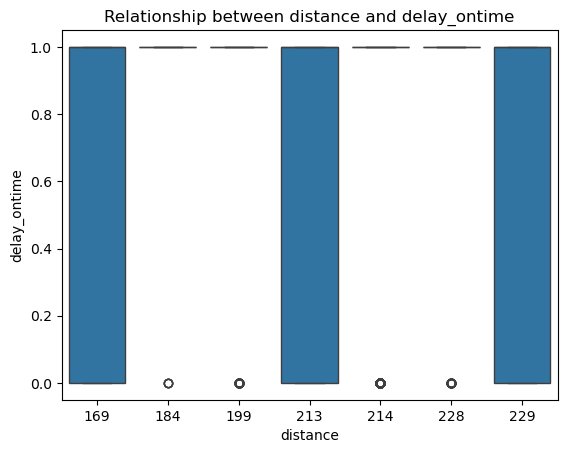

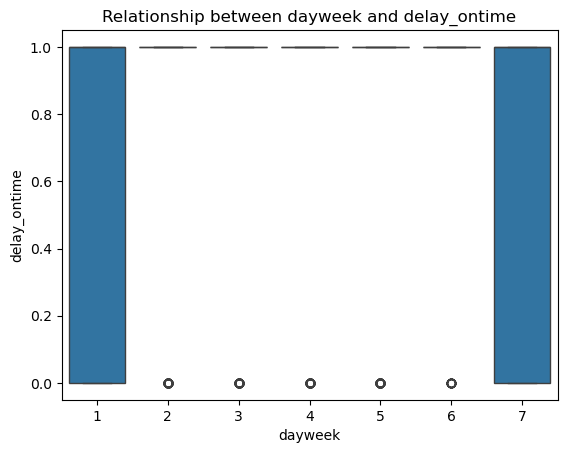

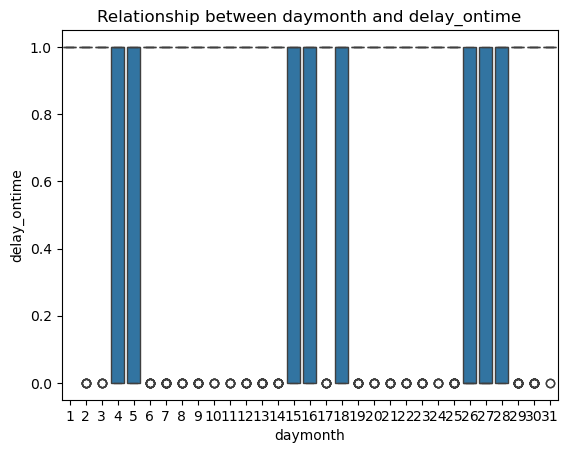

In [117]:
for feature in features[:-1]:  # Exclude 'delay_ontime' from the loop
    plt.figure()
    sns.boxplot(x=df[feature], y=df['delay_ontime'])
    plt.title(f"Relationship between {feature} and delay_ontime")
    plt.show()


In [124]:
df.columns

Index(['deptime', 'distance', 'weather', 'dayweek', 'daymonth', 'carrier_DH',
       'carrier_DL', 'carrier_MQ', 'carrier_OH', 'carrier_RU', 'carrier_UA',
       'carrier_US', 'dest_JFK', 'dest_LGA', 'origin_DCA', 'origin_IAD',
       'delay_ontime'],
      dtype='object')

In [118]:
### 10.Define features (X) and target (y)

In [125]:
X = df.drop('delay_ontime', axis=1)  # Features
y = df['delay_ontime']  # Target variable


In [126]:
features_to_use = ['distance', 'dayweek', 'daymonth']  # Add or remove features as needed
X = df[features_to_use]
y = df['delay_ontime']


In [127]:
from sklearn.model_selection import train_test_split

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [140]:
sc = StandardScaler()

In [142]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [143]:
svcm = SVC(kernel='linear')

In [145]:
svcm.fit(X_train, y_train)

SVC(kernel='linear')

In [147]:
y_pred = svcm.predict(X_test)

In [148]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy Score: {:.2f}%'. format(acc * 100))

Accuracy Score: 80.95%


In [149]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00        84
        True       0.81      1.00      0.89       357

    accuracy                           0.81       441
   macro avg       0.40      0.50      0.45       441
weighted avg       0.66      0.81      0.72       441



C:\Users\sonic\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sonic\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sonic\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [150]:
print(confusion_matrix(y_test, y_pred))

[[  0  84]
 [  0 357]]


In [151]:
yb = label_binarize(y, classes=[0, 1, 2])

In [152]:
classifier = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=42))

In [153]:
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [154]:
yb1 = yb.shape[1]

In [162]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import numpy as np

In [163]:
# Train a model
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [166]:
# Make predictions
y_score = model.predict_proba(X_test)
y_score

array([[0.15223041, 0.84776959],
       [0.14898506, 0.85101494],
       [0.04153134, 0.95846866],
       [0.44680228, 0.55319772],
       [0.13696133, 0.86303867],
       [0.02905835, 0.97094165],
       [0.30675131, 0.69324869],
       [0.24834163, 0.75165837],
       [0.        , 1.        ],
       [0.5041746 , 0.4958254 ],
       [0.15223041, 0.84776959],
       [0.09698688, 0.90301312],
       [0.15865896, 0.84134104],
       [0.44021104, 0.55978896],
       [0.002     , 0.998     ],
       [0.13696133, 0.86303867],
       [0.        , 1.        ],
       [0.21642499, 0.78357501],
       [0.33123268, 0.66876732],
       [0.        , 1.        ],
       [0.1852619 , 0.8147381 ],
       [0.65530339, 0.34469661],
       [0.44021104, 0.55978896],
       [0.        , 1.        ],
       [0.13014345, 0.86985655],
       [0.        , 1.        ],
       [0.08102849, 0.91897151],
       [0.16415567, 0.83584433],
       [0.03201419, 0.96798581],
       [0.        , 1.        ],
       [0.

In [169]:
y_score = model.predict_proba(X_test)
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


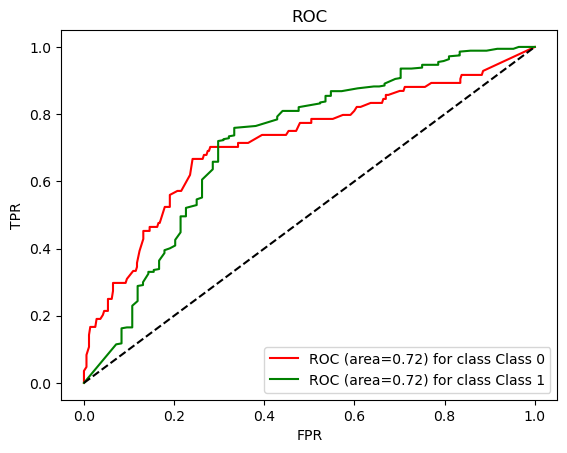

In [171]:
plt.figure()
color = ['red', 'green', 'blue']
class_labels = ['Class 0', 'Class 1', 'Class 2']  # Replace with your actual class labels
for i, color in zip(range(len(np.unique(y_test))), color):
    plt.plot(fpr[i], tpr[i], color=color, label='ROC (area={:.2f}) for class {}'.format(roc_auc[i], class_labels[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()


In [172]:
classifier_1 = OneVsRestClassifier(SVC(kernel='poly', probability=True, random_state=42))
classifier_1

OneVsRestClassifier(estimator=SVC(kernel='poly', probability=True,
                                  random_state=42))

In [173]:
svcm_A = SVC(kernel='poly')

In [175]:
svcm_A.fit(X_train, y_train)

SVC(kernel='poly')

In [177]:
y_pred_A = svcm_A.predict(X_test)

In [178]:
acc_A = accuracy_score(y_test, y_pred_A)
print('Accuracy Score: {:.2f}%'. format(acc_A * 100))

Accuracy Score: 80.95%


In [179]:
print(classification_report(y_test, y_pred_A))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00        84
        True       0.81      1.00      0.89       357

    accuracy                           0.81       441
   macro avg       0.40      0.50      0.45       441
weighted avg       0.66      0.81      0.72       441



C:\Users\sonic\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sonic\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sonic\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Train SVM model

In [180]:
svm_model = SVC(kernel='linear')  # or try 'rbf'
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

# Predict

In [181]:
y_pred = svm_model.predict(X_test)

# Evaluation

In [182]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[  0  84]
 [  0 357]]


In [183]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00        84
        True       0.81      1.00      0.89       357

    accuracy                           0.81       441
   macro avg       0.40      0.50      0.45       441
weighted avg       0.66      0.81      0.72       441



C:\Users\sonic\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sonic\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sonic\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [184]:
print(confusion_matrix(y_test, y_pred))

[[  0  84]
 [  0 357]]


In [185]:
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Accuracy Score:
0.8095238095238095
